In [1]:
import pandas as pd
import numpy as np
from skimpy import skim
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

In [3]:
dataset = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\sales_leads_dataset client project.csv")

In [5]:
dataset

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2023-01-01 00:00:00,1051,Referral,+1-723-296-8724x626,gfrancis@gmail.com,Agent E,Houston,Online,Low Potential
1,2023-01-01 01:00:00,1092,Cold Call,NaN,gomeztimothy@gmail.com,Agent D,Los Angeles,Online,High Potential
2,2023-01-01 02:00:00,1014,Social Media,337-557-9757,stephanieorr@hotmail.com,Agent B,Houston,Online,Low Potential
3,2023-01-01 03:00:00,1071,Referral,+1-331-637-9859,ernestbyrd@yahoo.com,Agent D,San Francisco,Online,Low Potential
4,2023-01-01 04:00:00,1060,Referral,NaN,shannon01@gmail.com,Agent E,San Francisco,Offline,Low Potential
...,...,...,...,...,...,...,...,...,...
7417,2023-11-06 01:00:00,1017,Social Media,NaN,djenkins@hotmail.com,Agent E,Chicago,Online,High Potential
7418,2023-11-06 02:00:00,1022,Cold Call,NaN,brownjohn@wong-cooper.info,Agent B,Houston,Offline,High Potential
7419,2023-11-06 03:00:00,1053,Cold Call,NaN,gblack@johnson.biz,Agent B,Los Angeles,Offline,Low Potential
7420,2023-11-06 04:00:00,1029,Website,873-332-3351x57062,hoffmanmichael@yahoo.com,Agent D,New York,Offline,Low Potential


In [7]:
dataset.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,2023-11-06 01:00:00,1017,Social Media,NaN,djenkins@hotmail.com,Agent E,Chicago,Online,High Potential
7418,2023-11-06 02:00:00,1022,Cold Call,NaN,brownjohn@wong-cooper.info,Agent B,Houston,Offline,High Potential
7419,2023-11-06 03:00:00,1053,Cold Call,NaN,gblack@johnson.biz,Agent B,Los Angeles,Offline,Low Potential
7420,2023-11-06 04:00:00,1029,Website,873-332-3351x57062,hoffmanmichael@yahoo.com,Agent D,New York,Offline,Low Potential
7421,2023-11-06 05:00:00,1097,Website,NaN,lopezkayla@white-rasmussen.com,Agent B,Chicago,Offline,Low Potential


In [9]:
dataset.shape

(7422, 9)

In [11]:
dataset.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
dataset.describe()

,Product_ID
count,7422.000000
mean,1049.197656
std,28.869251
min,1000.000000
25%,1024.000000
50%,1049.000000
75%,1074.000000
max,1099.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   int64 
 2   Source         7422 non-null   object
 3   Mobile         5221 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: int64(1), object(8)
memory usage: 522.0+ KB


In [17]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7422   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Product_ID       │    0 │      0 │   1049 │    28.87 │   1000 │   1024 │   1049 │   1074 │  1099 │ ▇▇▇▇▇▇  │  │
│ └──────────────────┴──────┴────────┴────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA         ┃ NA %        ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Created                    │          0 │           0 │                          2 │                 14844 │  │
│ │ Source                     │          0 │           0 │                        1.6 │                 11814 │  │
│ │ Mobile                     │       2201 │       29.66 │                        0.7 │                  5221 │  │
│ │ EMAIL                      │          0 │           0 │                          1 │                  7422 │  │
│ │ Sales_Agent                │          0 │           0 │                          2 │                 14844 │  │
│ │ Location                   │          0 │           0 │                        1.6 │                 11873 │  │
│ │ Delivery_Mode              │          0 │           0 │                          1 │                  7422 │  │
│ │ Status                     │          0 │           0 │                          2 │                 14844 │  │
│ └────────────────────────────┴────────────┴─────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

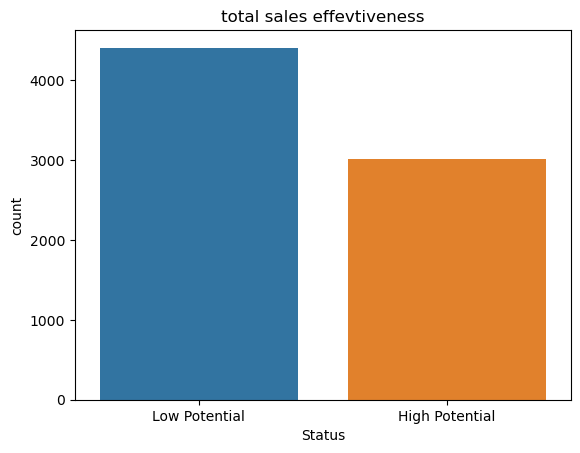

In [19]:
# Target distribution
sns.countplot(dataset,x=dataset["Status"], hue="Status")
plt.title("total sales effevtiveness")
plt.show()

In [20]:
# Check exact counts
print(dataset['Status'].value_counts(normalize=True) * 100)

Status
Low Potential     59.337106
High Potential    40.662894
Name: proportion, dtype: float64


In [23]:
dataset.isnull().sum().sum()

2201

In [25]:
dataset.duplicated().sum()

0

# logistic reggression

In [28]:
# Drop unnecessary columns or handle missing values if needed
dataset = dataset.drop(['Created', 'Mobile', 'EMAIL'], axis=1)  # Example: dropping columns that are not needed


In [30]:
 #Encode categorical variables
label_encoder = LabelEncoder()
dataset['Source'] = label_encoder.fit_transform(dataset['Source'])
dataset['Sales_Agent'] = label_encoder.fit_transform(dataset['Sales_Agent'])
dataset['Location'] = label_encoder.fit_transform(dataset['Location'])
dataset['Delivery_Mode'] = label_encoder.fit_transform(dataset['Delivery_Mode'])
dataset['Status'] = label_encoder.fit_transform(dataset['Status'])
#dataset['Created'] = label_encoder.fit_transform(dataset['Created'])


In [32]:
# Separate features and target variable
X = dataset.drop('Status', axis=1)
y = dataset['Status']


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       0.59      1.00      0.74       881

    accuracy                           0.59      1485
   macro avg       0.30      0.50      0.37      1485
weighted avg       0.35      0.59      0.44      1485

[[  0 604]
 [  0 881]]


# Decision tree 

In [72]:
# Display the first few rows of the dataset
print(dataset.head())

   Product_ID  Source  Sales_Agent  Location  Delivery_Mode  Status
0        1051       2            4         1              1       1
1        1092       0            3         2              1       0
2        1014       3            1         1              1       1
3        1071       2            3         4              1       1
4        1060       2            4         4              0       1


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [76]:
# Convert categorical columns to numerical values
label_encoders = {}
categorical_columns = ['Source', 'Location', 'Delivery_Mode', 'Status']

for column in categorical_columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Display the first few rows after encoding
print(dataset.head())

   Product_ID  Source  Sales_Agent  Location  Delivery_Mode  Status
0        1051       2            4         1              1       1
1        1092       0            3         2              1       0
2        1014       3            1         1              1       1
3        1071       2            3         4              1       1
4        1060       2            4         4              0       1


In [78]:
# Features (X) and Target (y)
X = dataset.drop([ 'Status'], axis=1)
y = dataset['Status']

In [80]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       604
           1       0.59      1.00      0.74       881

    accuracy                           0.59      1485
   macro avg       0.30      0.50      0.37      1485
weighted avg       0.35      0.59      0.44      1485

[[  0 604]
 [  0 881]]
